In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [18]:
placement = pd.read_csv("PlacementDataset.csv")

In [19]:
placement.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [20]:
placement_copy=placement.copy()

In [21]:
placement_copy.shape

(215, 15)

In [6]:
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

## NAN Handling

In [22]:
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [23]:
placement_copy['salary'].fillna(value=0 , inplace = True )

In [24]:
placement_copy.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [25]:
placement_copy.drop(['salary','sl_no','ssc_b','hsc_b'], axis=1, inplace=True)

In [26]:
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


## Outlier Handling

Text(0.5, 1.0, 'Employability Percentage')

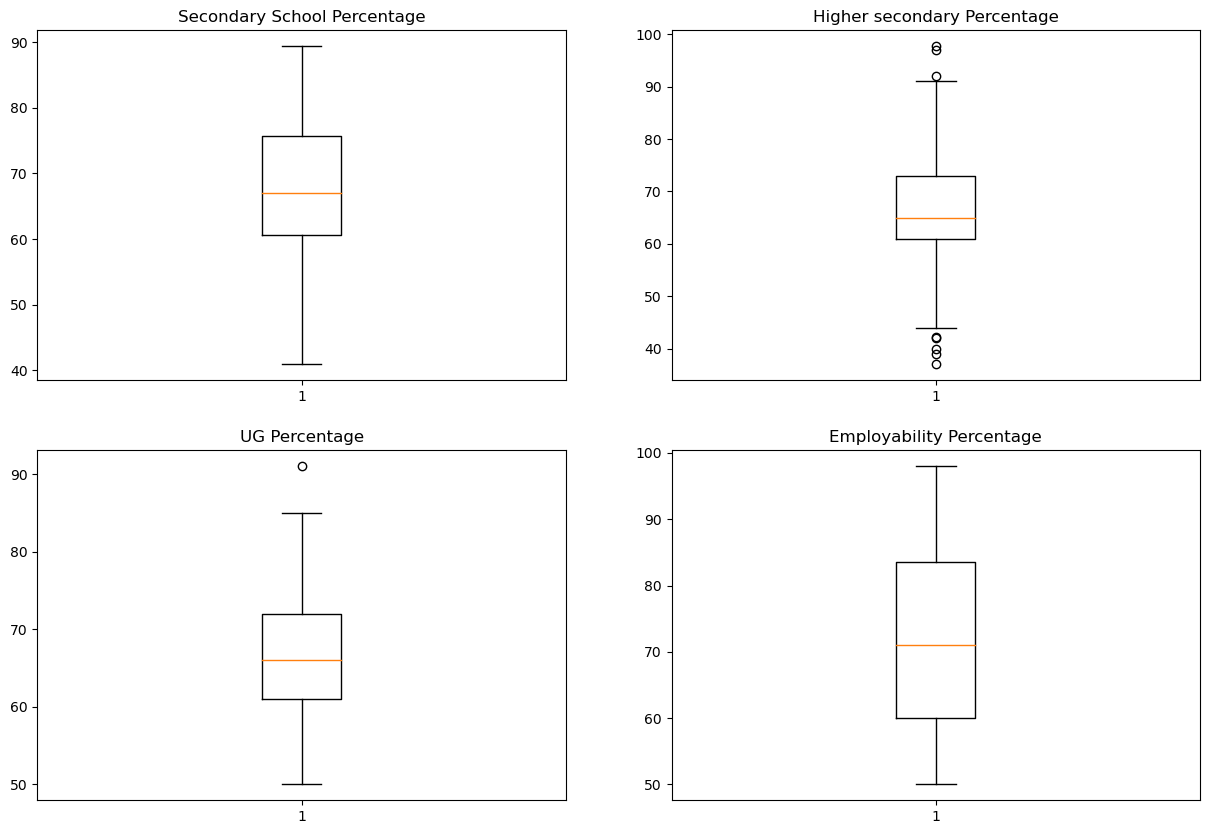

In [27]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

In [28]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a5c9295110>,
 'caps': [<matplotlib.lines.Line2D at 0x2a5c9326590>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a5c9324750>],
 'medians': [<matplotlib.lines.Line2D at 0x2a5c9327590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a5c9326310>],
 'means': []}

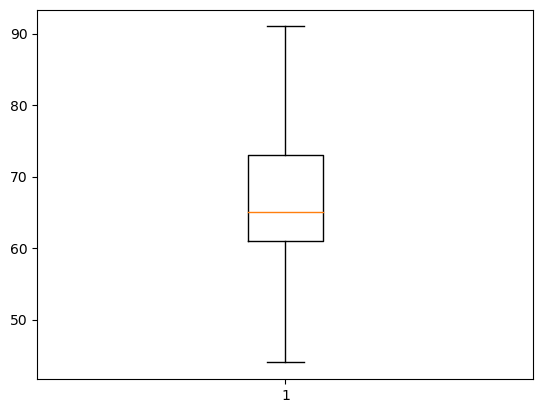

In [14]:
plt.boxplot(placement_filtered['hsc_p'])

## Data Visualization

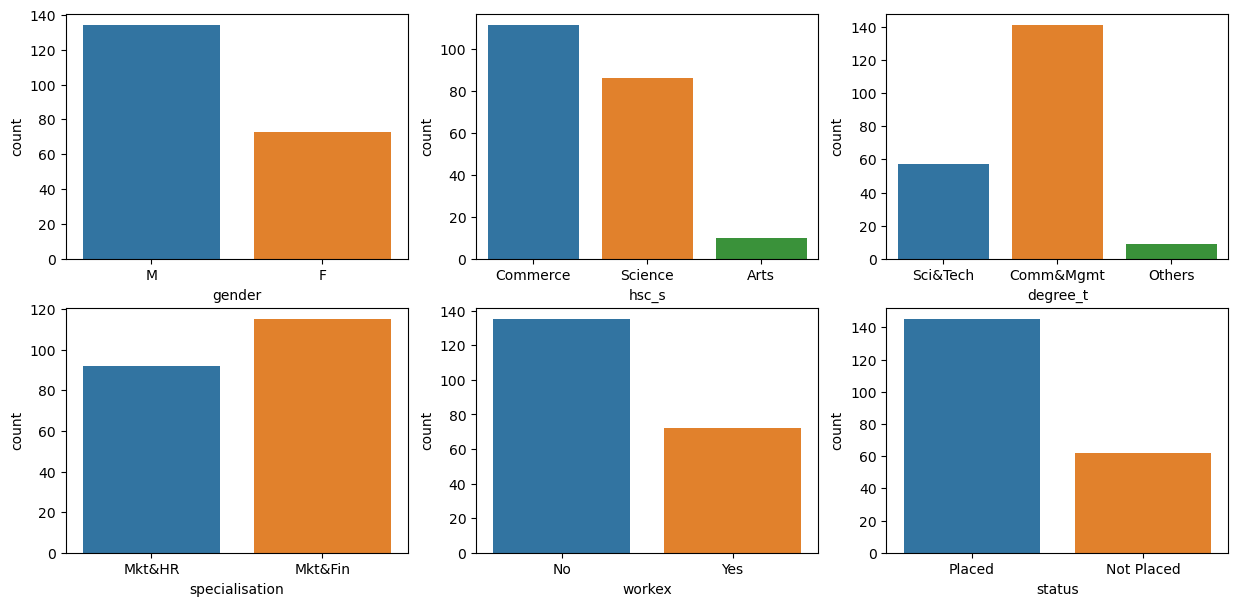

In [29]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


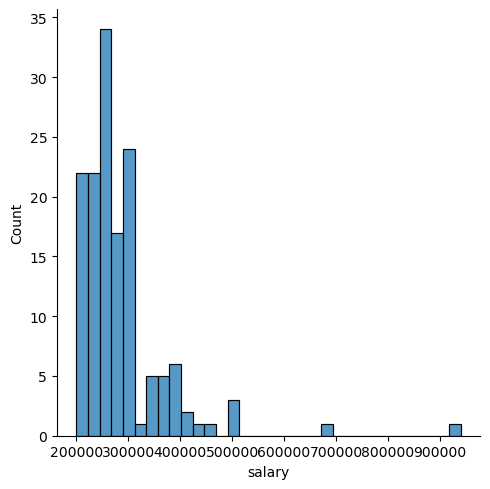

In [16]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.displot(placement_placed['salary'])

## Encoding

In [31]:
#Label Encoding
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
placement_filtered["degree_t"] = placement_filtered["degree_t"].astype('category')
placement_filtered["workex"] = placement_filtered["workex"].astype('category')
placement_filtered["specialisation"] = placement_filtered["specialisation"].astype('category')
placement_filtered["status"] = placement_filtered["status"].astype('category')
placement_filtered["gender"] = placement_filtered["gender"].astype('category')
placement_filtered["hsc_s"] = placement_filtered["hsc_s"].astype('category')
placement_filtered.dtypes
placement_filtered["workex"] = placement_filtered["workex"].cat.codes
placement_filtered["gender"] = placement_filtered["gender"].cat.codes
placement_filtered["degree_t"] = placement_filtered["degree_t"].cat.codes
placement_filtered["specialisation"] =placement_filtered["specialisation"].cat.codes
placement_filtered["status"] = placement_filtered["status"].cat.codes
placement_filtered["hsc_s"] = placement_filtered["hsc_s"].cat.codes
    
placement_filtered.head(10)


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,91.00,1,58.00,2,0,55.00,1,58.80,1
1,1,79.33,78.33,2,77.48,2,1,86.50,0,66.28,1
2,1,65.00,68.00,0,64.00,0,0,75.00,0,57.80,1
3,1,56.00,52.00,2,52.00,2,0,66.00,1,59.43,0
4,1,85.80,73.60,1,73.30,0,0,96.80,0,55.50,1
5,1,55.00,49.80,2,67.25,2,1,55.00,0,51.58,0
6,0,46.00,49.20,1,79.00,0,0,74.28,0,53.29,0
7,1,82.00,64.00,2,66.00,2,1,67.00,0,62.14,1
8,1,73.00,79.00,1,72.00,0,0,91.34,0,61.29,1
9,1,58.00,70.00,1,61.00,0,0,54.00,0,52.21,0


In [33]:
placement_filtered.describe()


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.647343,67.561981,66.544783,1.367150,66.388744,0.594203,0.347826,71.829662,0.444444,62.284348,0.700483
std,0.478955,10.654887,9.690330,0.574949,7.277999,0.892017,0.477435,13.077954,0.498109,5.739603,0.459157
min,0.000000,40.890000,44.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.290000,0.000000
25%,0.000000,61.000000,61.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,58.110000,0.000000
50%,1.000000,67.000000,65.000000,1.000000,66.000000,0.000000,0.000000,70.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,73.000000,2.000000,72.000000,2.000000,1.000000,82.830000,1.000000,66.145000,1.000000
max,1.000000,89.400000,91.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


## Splitting Data

In [35]:
X = placement_filtered.drop(['status'],axis=1)
y = placement_filtered.status

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , random_state = 1)

## Classification Models

In [37]:
#Logistic Regression - 
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

logreg.fit(X_train , y_train)

y_pred = logreg.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.8571428571428571

In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

dt = dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7380952380952381


In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(n_estimators = 100)

rt.fit(X_train , y_train)
y_pred = rt.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test , y_pred))

Accuracy 0.7619047619047619


In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.8333333333333334

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p=2)
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)
accuracy_score(y_test,y_knn_pred)

0.7619047619047619

In [48]:
import pickle
# Lets dump our logistic Regression model
pickle.dump(logreg, open('logreg_model.pkl','wb'))

In [49]:
model = pickle.load(open('logreg_model.pkl','rb'))
print(model.predict([[0	,16.00,		12.00,		2,	12.00,	2,	0,	26.0,	1,	59.43]]))

[0]
